In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install mysql-connector-python

## DATA IMPORTING

### In my local machine I have installed, MySQL Server and workbench with essential connectors for python.

### Now, I will create a DB through python by connecting to the MySQL Server.

In [3]:
import mysql.connector

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  passwd="root",
  port="3306"
)

print(mydb)

### We have successfully connected to the MySQL Server running on 127.0.0.1:3306 

In [4]:
mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE mydb")
## if databse doesn't exist

In [5]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  passwd="root",
  port="3306",
  database="mydb"
)

### Have created a DB and succesfully connected to it

### Using MySQL Workbench I have created two tables: telcomcustomer-churn_1 and telcomcustomer-churn_2

### telcomcustomer-churn_1 has part1 of dataset and telcomcustomer-churn_2 has part2 of dataset

### The datasets have been loaded to the table using the import csv option

#### telcomcustomer-churn_1 table snapshot ->

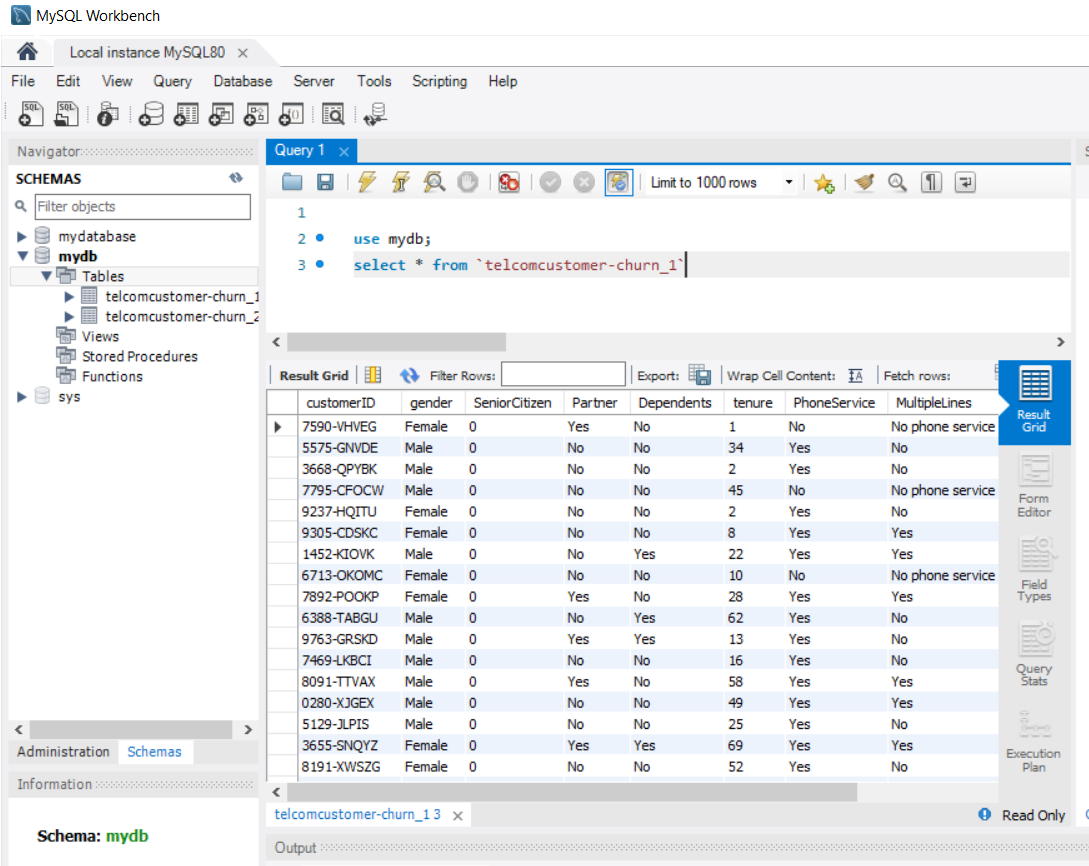 


#### telcomcustomer-churn_2 table snapshot ->

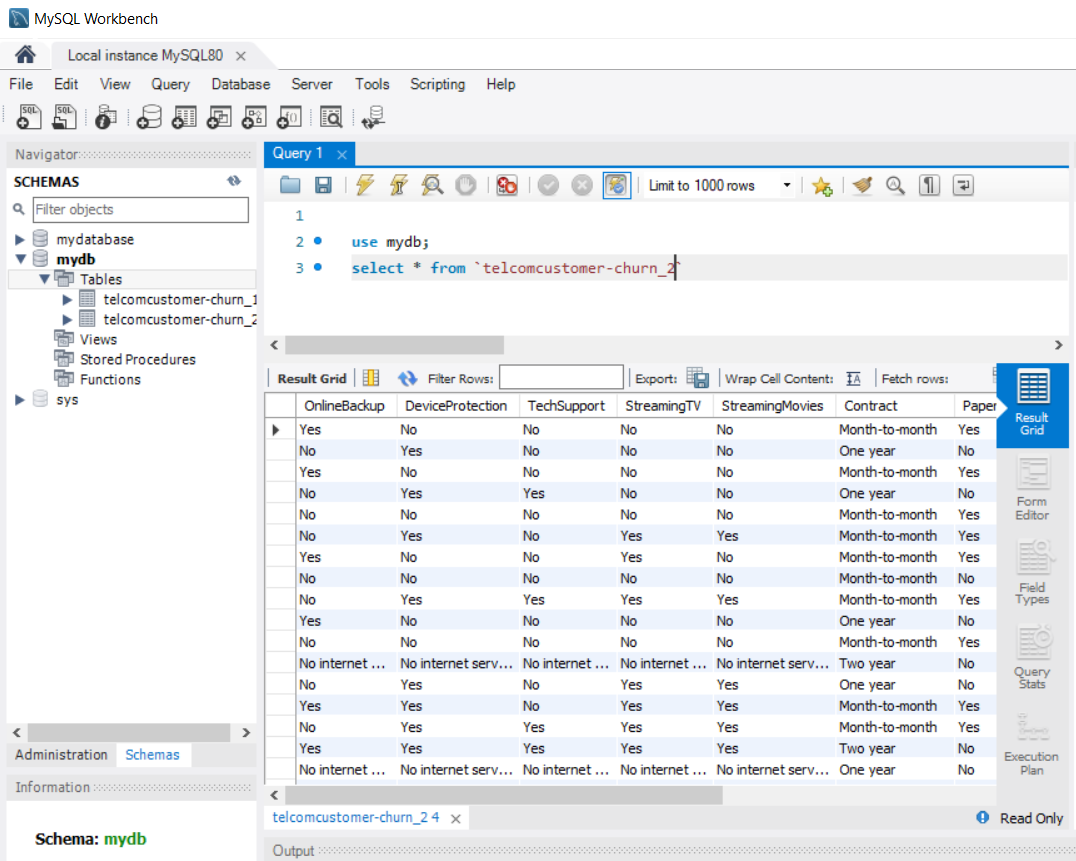

### Importing table 1

In [6]:
mycursor = mydb.cursor()
sql = "SELECT * FROM `telcomcustomer-churn_1`"
mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

('7590-VHVEG', 'Female', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL', 'No')
('5575-GNVDE', 'Male', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL', 'Yes')
('3668-QPYBK', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL', 'Yes')
('7795-CFOCW', 'Male', 0, 'No', 'No', 45, 'No', 'No phone service', 'DSL', 'Yes')
('9237-HQITU', 'Female', 0, 'No', 'No', 2, 'Yes', 'No', 'Fiber optic', 'No')
('9305-CDSKC', 'Female', 0, 'No', 'No', 8, 'Yes', 'Yes', 'Fiber optic', 'No')
('1452-KIOVK', 'Male', 0, 'No', 'Yes', 22, 'Yes', 'Yes', 'Fiber optic', 'No')
('6713-OKOMC', 'Female', 0, 'No', 'No', 10, 'No', 'No phone service', 'DSL', 'Yes')
('7892-POOKP', 'Female', 0, 'Yes', 'No', 28, 'Yes', 'Yes', 'Fiber optic', 'No')
('6388-TABGU', 'Male', 0, 'No', 'Yes', 62, 'Yes', 'No', 'DSL', 'Yes')
('9763-GRSKD', 'Male', 0, 'Yes', 'Yes', 13, 'Yes', 'No', 'DSL', 'Yes')
('7469-LKBCI', 'Male', 0, 'No', 'No', 16, 'Yes', 'No', 'No', 'No internet service')
('8091-TTVAX', 'Male', 0, 'Yes', 'No', 58, 'Yes', 'Yes', 'Fiber optic', 'No'

In [7]:
from pandas import DataFrame
df = DataFrame(myresult)

In [8]:
sequence = mycursor.column_names
sequence

('customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity')

In [9]:
df.columns = sequence

In [10]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  
0              No  No phone service             DSL             No  
1             Yes                No             DSL            Yes  
2             Yes                No             DSL            Yes  
3              No  No phone service             DSL            Yes  
4             Yes                No     Fiber optic             No  
...           ...               ...             ...            ...  
7038          Yes               Yes             DSL            Yes  
7039          Yes               Yes     Fiber optic             No  
7040           No  No phone service             DSL            Yes  
7041          Yes               Yes     Fiber optic             No  
7042          Yes                No     Fiber optic            Yes  

[7043 rows x 10 columns]

### Importing table 2

In [11]:
mycursor = mydb.cursor()
sql = "SELECT * FROM `telcomcustomer-churn_2`"
mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

('Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 29.85, 29.85, 'No')
('No', 'Yes', 'No', 'No', 'No', 'One year', 'No', 'Mailed check', 56.95, 1889.5, 'No')
('Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Mailed check', 53.85, 108.15, 'Yes')
('No', 'Yes', 'Yes', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 42.3, 1840.75, 'No')
('No', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes', 'Electronic check', 70.7, 151.65, 'Yes')
('No', 'Yes', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 99.65, 820.5, 'Yes')
('Yes', 'No', 'No', 'Yes', 'No', 'Month-to-month', 'Yes', 'Credit card (automatic)', 89.1, 1949.4, 'No')
('No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Mailed check', 29.75, 301.9, 'No')
('No', 'Yes', 'Yes', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Electronic check', 104.8, 3046.05, 'Yes')
('Yes', 'No', 'No', 'No', 'No', 'One year', 'No', 'Bank transfer (automatic)', 56.15, 3487.95, 'No')
('No', 'No', 'No', 'No'

In [12]:
from pandas import DataFrame
df2 = DataFrame(myresult)

In [13]:
sequence2 = mycursor.column_names
sequence2

('OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn')

In [14]:
df2.columns = sequence2
df2

OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7027           No              Yes         Yes         Yes             Yes   
7028          Yes              Yes          No         Yes             Yes   
7029           No               No          No          No              No   
7030           No               No          No          No              No   
7031           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7027        One year              Yes               Mailed check   
7028        One year              Yes    Credit card (automatic)   
7029  Month-to-month              Yes           Electronic check   
7030  Month-to-month              Yes               Mailed check   
7031        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       1889.50    No  
2              53.85        108.15   Yes  
3              42.30       1840.75    No  
4              70.70        151.65   Yes  
...              ...           ...   ...  
7027           84.80       1990.50    No  
7028          103.20       7362.90    No  
7029           29.60        346.45    No  
7030           74.40        306.60   Yes  
7031          105.65       6844.50    No  

[7032 rows x 11 columns]

In [15]:
print("Dimension of Table1: {}".format(df.shape))
#The Data1 consists of 7043 data points, with 10 features

Dimension of Table1: (7043, 10)


In [56]:
df.dtypes

customerID         object
gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
OnlineSecurity     object
dtype: object

In [16]:
print("Dimension of Table2: {}".format(df2.shape))
#The Data1 consists of 7032 data points, with 11 features

Dimension of Table2: (7032, 11)


In [57]:
df2.dtypes

OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## MERGING DATASETS

In [67]:
## this performs a join and thus for table 1 we have all the rows, table 2 has lesser rows so that would be filled with NA
cust2 = pd.concat([df, df2], axis=1)
cust2

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              NaN         NaN         NaN             NaN             NaN   
7039              NaN         NaN         NaN             NaN             NaN   
7040              NaN         NaN         NaN             NaN             NaN   
7041              NaN         NaN         NaN             NaN             NaN   
7042              NaN         NaN         NaN             NaN             NaN   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              NaN                        NaN            NaN           NaN   
7039              NaN                        NaN            NaN           NaN   
7040              NaN                        NaN            NaN           NaN   
7041              NaN                        NaN            NaN           NaN   
7042              NaN                        NaN            NaN           NaN   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038    NaN  
7039    NaN  
7040    NaN  
7041    NaN  
7042    NaN  

[7043 rows x 21 columns]

## DATA CLEANSING

In [68]:
# The first column is customerid column which has nothing to do with the churn value. So drop it.
cust2 = cust2.drop(labels = "customerID", axis = 1)

In [70]:
cust2.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

In [71]:
cust2.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

In [72]:
cust2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [77]:
## Since there are only 11 NA columns so that would not cause big difference if they are removed. Hence dropping them

data2 = cust2
data2 = data2.dropna()

In [78]:
# thus our final dataset with 7032 rows and 20 columns
data2.shape

(7032, 20)

In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [82]:
for feature in data2.columns: # Loop through all columns in the dataframe
    if data2[feature].dtype == 'object': # Only apply for columns with categorical strings
        data2[feature] = pd.Categorical(data2[feature])# Replace strings with an integer
data2.head(10)

<ipython-input-82-1c696550cf41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[feature] = pd.Categorical(data2[feature])# Replace strings with an integer


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   
5  Female              0      No         No       8          Yes   
6    Male              0      No        Yes      22          Yes   
7  Female              0      No         No      10           No   
8  Female              0     Yes         No      28          Yes   
9    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   
5              Yes           Electronic check           99.65        820.50   
6              Yes    Credit card (automatic)           89.10       1949.40   
7               No               Mailed check           29.75        301.90   
8              Yes           Electronic check          104.80       3046.05   
9               No  Bank transfer (automatic)           56.15       3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [85]:
print(data2.gender.value_counts())
print(data2.Partner.value_counts())
print(data2.Dependents.value_counts())
print(data2.PhoneService.value_counts())
print(data2.MultipleLines.value_counts())
print(data2.InternetService.value_counts())
print(data2.OnlineSecurity.value_counts())
print(data2.OnlineBackup.value_counts())
print(data2.DeviceProtection.value_counts())
print(data2.TechSupport.value_counts())
print(data2.StreamingTV.value_counts())
print(data2.StreamingMovies.value_counts())
print(data2.Contract.value_counts())
print(data2.PaperlessBilling.value_counts())
print(data2.PaymentMethod.value_counts())
print(data2.Churn.value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
No     3634
Yes    3398
Name: Partner, dtype: int64
No     4925
Yes    2107
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3386
Yes                 2966
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3089
DSL            2418
No             1525
Name: InternetService, dtype: int64
No                     3492
Yes                    2015
No internet service    1525
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV

In [87]:
replaceStruct = {
                "gender"     :    {"Female": 1,"Male": 0},
                "Partner"    :    {"Yes": 1, "No": 0},
                "Dependents" :    {"Yes": 1, "No": 0},
                "PhoneService":   {"Yes": 1, "No": 0},
                "MultipleLines":  {"Yes": 1, "No": 0, "No phone service": -1 },
                "InternetService": {"Fiber optic" : 2, "DSL" : 1, "No" : 0},
                "OnlineSecurity" : {"Yes": 1, "No": 0, "No internet service": -1 },
                "OnlineBackup" : {"Yes": 1, "No": 0, "No internet service": -1 },
                "DeviceProtection" : {"Yes": 1, "No": 0, "No internet service": -1 },
                "TechSupport" : {"Yes": 1, "No": 0, "No internet service": -1 },
                "StreamingTV" : {"Yes": 1, "No": 0, "No internet service": -1 },
                "StreamingMovies" : {"Yes": 1, "No": 0, "No internet service": -1 },
                "Contract" : {"Month-to-month": 0, "One year": 1, "Two year": 2 },
                "PaperlessBilling"    :    {"Yes": 1, "No": 0},
                "PaymentMethod" : {"Electronic check" : 1, "Mailed check" : 2, "Bank transfer (automatic)" : 3, "Credit card (automatic)" : 4 },
                "Churn"    :    {"Yes": 1, "No": 0},
                }


In [88]:
data2=data2.replace(replaceStruct)
data2.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   
5       1              0        0           0       8             1   
6       0              0        0           1      22             1   
7       1              0        0           0      10             0   
8       1              0        1           0      28             1   
9       0              0        0           1      62             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             -1                1               0             1   
1              0                1               1             0   
2              0                1               1             1   
3             -1                1               1             0   
4              0                2               0             0   
5              1                2               0             0   
6              1                2               0             1   
7             -1                1               1             0   
8              1                2               0             0   
9              0                1               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   
5                 1            0            1                1         0   
6                 0            0            1                0         0   
7                 0            0            0                0         0   
8                 1            1            1                1         0   
9                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              1           29.85         29.85      0  
1                 0              2           56.95       1889.50      0  
2                 1              2           53.85        108.15      1  
3                 0              3           42.30       1840.75      0  
4                 1              1           70.70        151.65      1  
5                 1              1           99.65        820.50      1  
6                 1              4           89.10       1949.40      0  
7                 0              2           29.75        301.90      0  
8                 1              1          104.80       3046.05      1  
9                 0              3           56.15       3487.95      0

## DATA ANALYSIS & VISUALISATION

In [107]:
data2.describe().transpose()

count         mean          std    min       25%       50%  \
gender            7032.0     0.495307     0.500014   0.00    0.0000     0.000   
SeniorCitizen     7032.0     0.162116     0.368583   0.00    0.0000     0.000   
Partner           7032.0     0.483220     0.499754   0.00    0.0000     0.000   
Dependents        7032.0     0.299630     0.458129   0.00    0.0000     0.000   
tenure            7032.0    32.366894    24.554333   0.00    9.0000    29.000   
PhoneService      7032.0     0.903299     0.295571   0.00    1.0000     1.000   
MultipleLines     7032.0     0.325085     0.642546  -1.00    0.0000     0.000   
InternetService   7032.0     1.222412     0.778950   0.00    1.0000     1.000   
OnlineSecurity    7032.0     0.069681     0.706136  -1.00    0.0000     0.000   
OnlineBackup      7032.0     0.128697     0.737917  -1.00    0.0000     0.000   
DeviceProtection  7032.0     0.127702     0.737415  -1.00    0.0000     0.000   
TechSupport       7032.0     0.073948     0.707715  -1.00    0.0000     0.000   
StreamingTV       7032.0     0.168231     0.756518  -1.00    0.0000     0.000   
StreamingMovies   7032.0     0.172213     0.758252  -1.00    0.0000     0.000   
Contract          7032.0     0.688567     0.832934   0.00    0.0000     0.000   
PaperlessBilling  7032.0     0.592719     0.491363   0.00    0.0000     1.000   
PaymentMethod     7032.0     2.315557     1.149523   1.00    1.0000     2.000   
MonthlyCharges    7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges      7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   
Churn             7032.0     0.265785     0.441782   0.00    0.0000     0.000   

                        75%      max  
gender               1.0000     1.00  
SeniorCitizen        0.0000     1.00  
Partner              1.0000     1.00  
Dependents           1.0000     1.00  
tenure              55.0000    72.00  
PhoneService         1.0000     1.00  
MultipleLines        1.0000     1.00  
InternetService      2.0000     2.00  
OnlineSecurity       1.0000     1.00  
OnlineBackup         1.0000     1.00  
DeviceProtection     1.0000     1.00  
TechSupport          1.0000     1.00  
StreamingTV          1.0000     1.00  
StreamingMovies      1.0000     1.00  
Contract             1.0000     2.00  
PaperlessBilling     1.0000     1.00  
PaymentMethod        3.0000     4.00  
MonthlyCharges      89.8625   118.75  
TotalCharges      3794.7375  8684.80  
Churn                1.0000     1.00

D:\shriy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

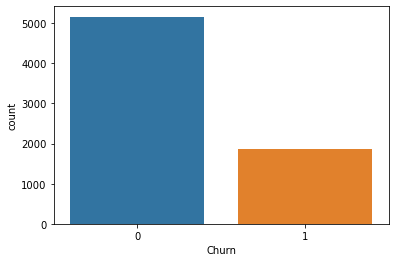

In [96]:
#plot the graphs of different variable to see the distributions.

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(data2['Churn'])

D:\shriy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

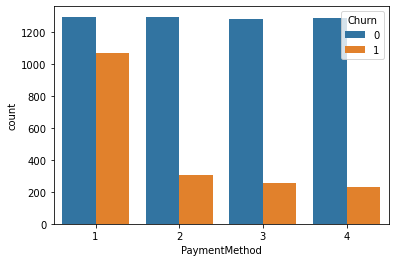

In [92]:
sns.countplot(data2['PaymentMethod'],hue=data2['Churn'])

##"PaymentMethod":{"Electronic check" : 1, "Mailed check" : 2, "Bank transfer (automatic)" : 3, "Credit card (automatic)" : 4 },
##"Churn":{"Yes": 1, "No": 0},

## Highest electronic check customer have churned =  yes

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

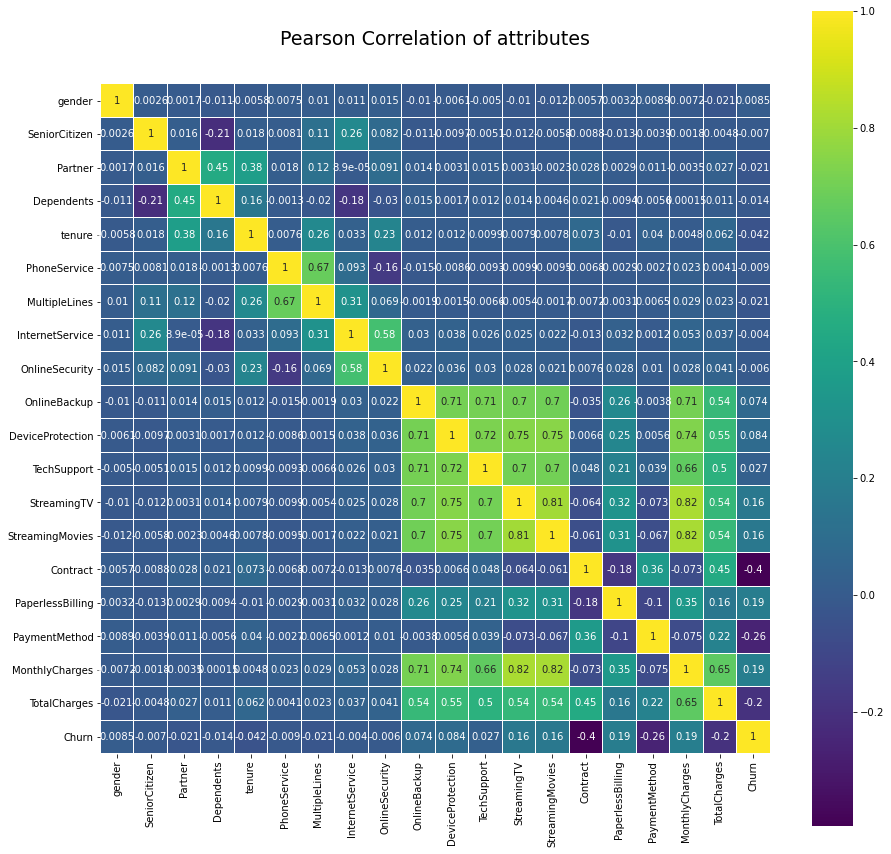

In [94]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(data2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

#We see churn is highly negatively correlated to Contract
#We see Streaming TV and Streaming Movies are highly positively correlated to Monthly charges
#We see StreamingTV is highly correalted to StreamingMovies attribute (means one who streams movies streams Tv also)

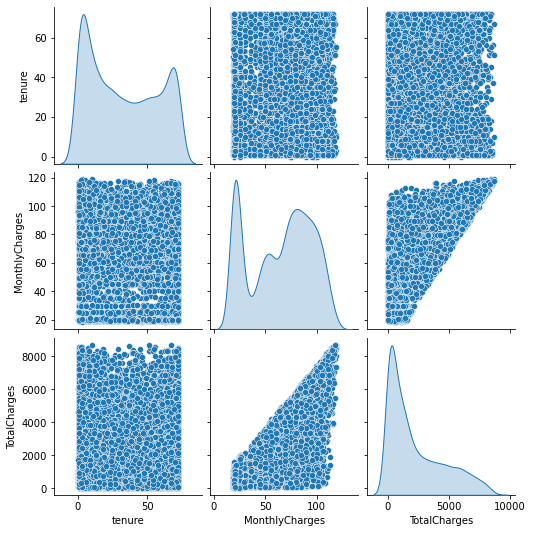

In [95]:
feature_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
import seaborn as sns
sns.pairplot(data2[feature_columns], diag_kind = 'kde')
#We see Monthly charges and TotalCharges are negatively corrleated

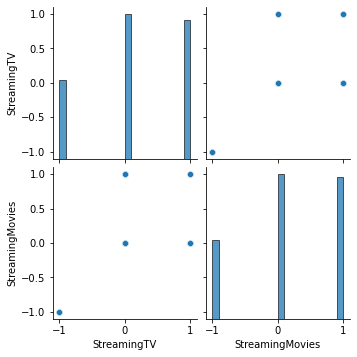

In [106]:
sns.pairplot(data2[['StreamingTV','StreamingMovies']])
#shows their high correlation

D:\shriy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


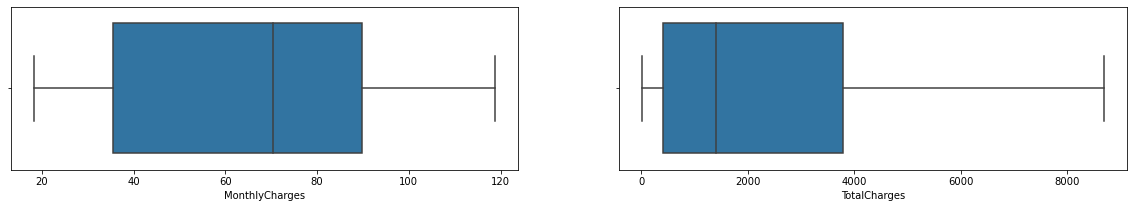

In [403]:
numeric_col = data2.columns[pd.Series(data2.columns).apply(lambda x : data2[x].dtype == 'float64')]  # Non object columns

plt.figure(figsize = (20,3))

j = 1
for i in numeric_col:
    plt.subplot(1,2,j)
    sns.boxplot(data2[i])
    j += 1

Monthly charges seems to be left skewed, and Total Charges seems to be right skewed. Though both have almost no outliers in the data. 

D:\shriy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

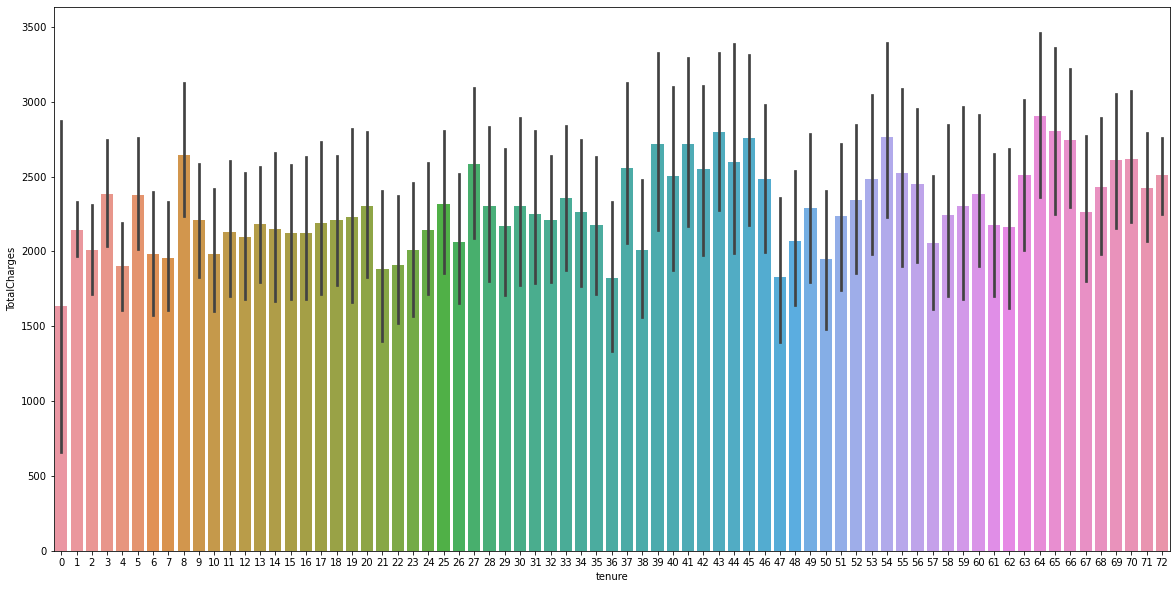

In [476]:
plt.figure(figsize=(20,10))
#Customer's age and the HighestSpend relation
sns.barplot(data2['tenure'], data2['TotalCharges'])

D:\shriy\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

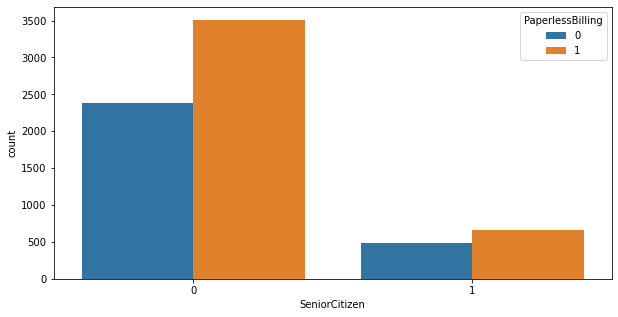

In [481]:
plt.figure(figsize=(10,5))
#Customer's age and the Internet Banking relation
sns.countplot(data2['SeniorCitizen'],hue=data2['PaperlessBilling'])

## DATA PRE-PROCESSING

In [108]:
X = data2.drop("Churn", axis=1)
y = data2['Churn']

In [110]:
#Checking for class imbalance
y.value_counts()
#shows totally imbalanced target variable here

0    5163
1    1869
Name: Churn, dtype: int64

In [111]:
# Class count
count_class_0, count_class_1 = y.value_counts()

# Divide by class
df_class_0 = data2[data2['Churn'] == 0]
df_class_1 = data2[data2['Churn'] == 1]

### Random undersampling

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


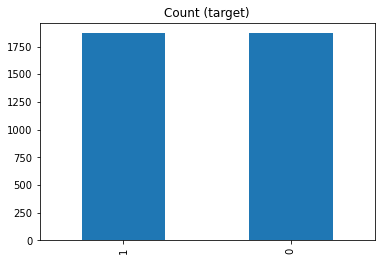

In [112]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

df_test_under.Churn.value_counts().plot(kind='bar', title='Count (target)');

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

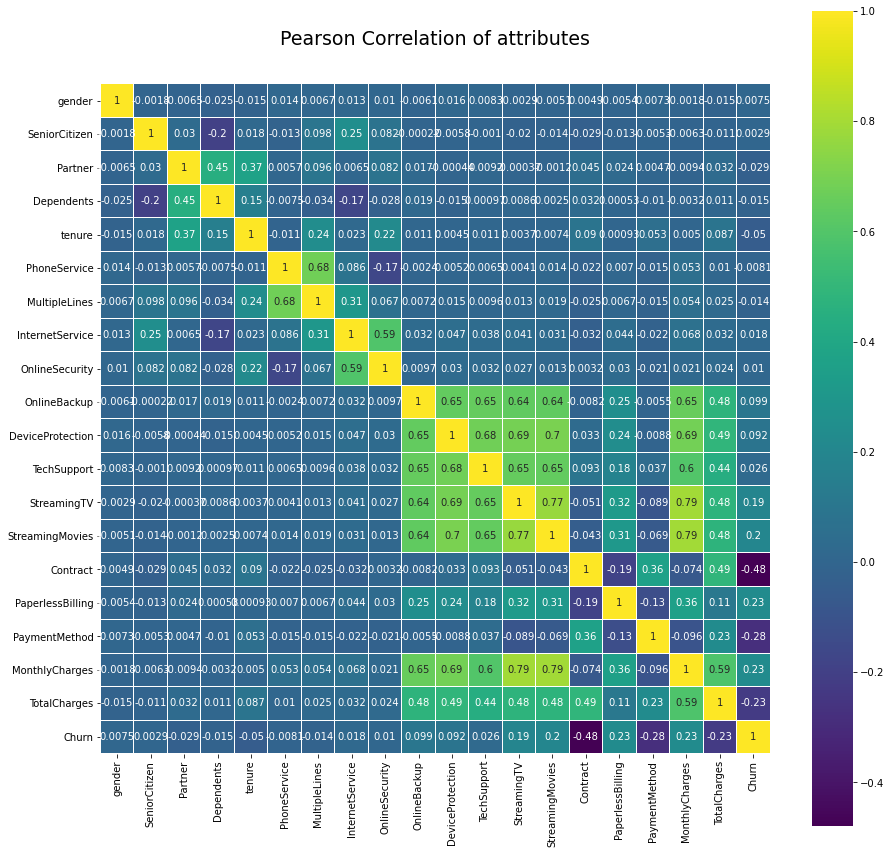

In [114]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df_test_under.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Random oversampling

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


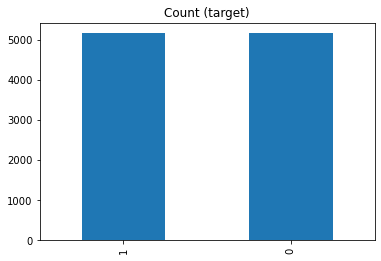

In [113]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

df_test_over.Churn.value_counts().plot(kind='bar', title='Count (target)');

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

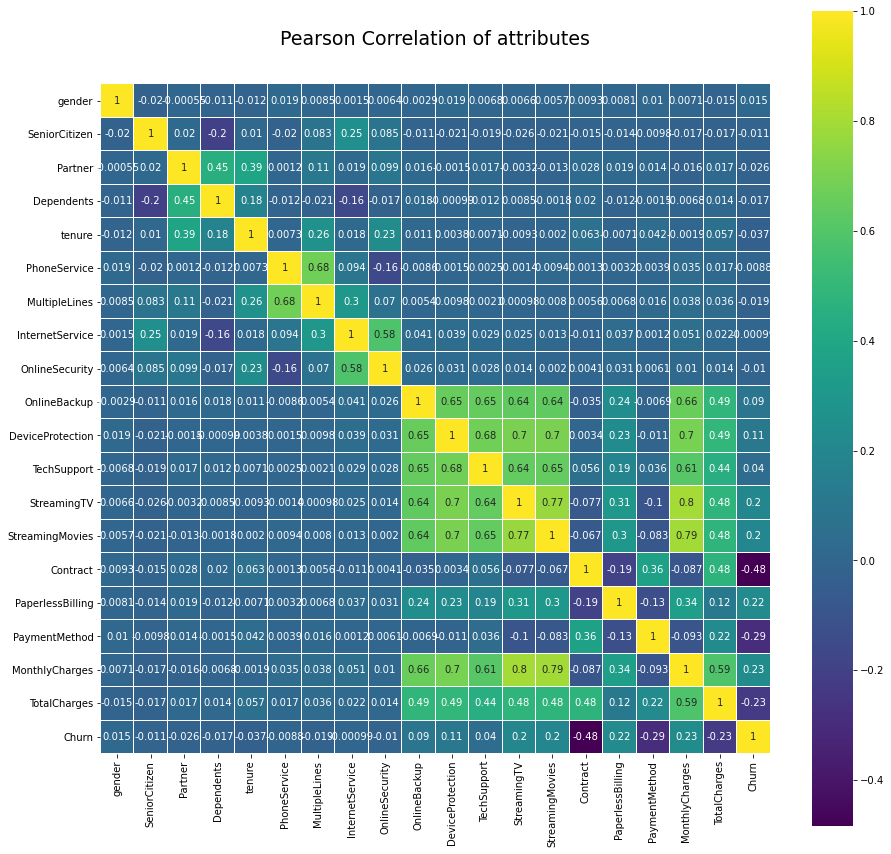

In [115]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df_test_over.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## MODEL TRAINING, TESTING AND TUNING

### Using the undersampled data 

In [404]:
X_under = df_test_under.drop("Churn", axis=1)
y_under = df_test_under['Churn']

In [405]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=.30, random_state=1)

In [406]:
X_under.describe().transpose()

count         mean          std    min       25%       50%  \
gender            3738.0     0.498662     0.500065   0.00    0.0000     0.000   
SeniorCitizen     3738.0     0.156768     0.363631   0.00    0.0000     0.000   
Partner           3738.0     0.480203     0.499675   0.00    0.0000     0.000   
Dependents        3738.0     0.295880     0.456498   0.00    0.0000     0.000   
tenure            3738.0    31.899144    24.394991   0.00    9.0000    27.000   
PhoneService      3738.0     0.901284     0.298320   0.00    1.0000     1.000   
MultipleLines     3738.0     0.311664     0.641928  -1.00    0.0000     0.000   
InternetService   3738.0     1.203050     0.780908   0.00    1.0000     1.000   
OnlineSecurity    3738.0     0.055377     0.707303  -1.00    0.0000     0.000   
OnlineBackup      3738.0     0.152220     0.678897  -1.00    0.0000     0.000   
DeviceProtection  3738.0     0.168004     0.686756  -1.00    0.0000     0.000   
TechSupport       3738.0     0.088550     0.642299  -1.00    0.0000     0.000   
StreamingTV       3738.0     0.236490     0.715841  -1.00    0.0000     0.000   
StreamingMovies   3738.0     0.235955     0.715643  -1.00    0.0000     0.000   
Contract          3738.0     0.509631     0.769737   0.00    0.0000     0.000   
PaperlessBilling  3738.0     0.638844     0.480400   0.00    0.0000     1.000   
PaymentMethod     3738.0     2.135367     1.147358   1.00    1.0000     2.000   
MonthlyCharges    3738.0    67.858842    28.828665  18.25   45.4000    74.600   
TotalCharges      3738.0  2023.073555  2179.761748  18.80  265.4625  1134.075   

                        75%      max  
gender               1.0000     1.00  
SeniorCitizen        0.0000     1.00  
Partner              1.0000     1.00  
Dependents           1.0000     1.00  
tenure              54.0000    72.00  
PhoneService         1.0000     1.00  
MultipleLines        1.0000     1.00  
InternetService      2.0000     2.00  
OnlineSecurity       1.0000     1.00  
OnlineBackup         1.0000     1.00  
DeviceProtection     1.0000     1.00  
TechSupport          1.0000     1.00  
StreamingTV          1.0000     1.00  
StreamingMovies      1.0000     1.00  
Contract             1.0000     2.00  
PaperlessBilling     1.0000     1.00  
PaymentMethod        3.0000     4.00  
MonthlyCharges      90.8000   118.35  
TotalCharges      3216.1375  8684.80

In [407]:
X_train.describe().transpose()
## Yes its almost same to the original data

count         mean          std    min       25%      50%  \
gender            2616.0     0.493119     0.500048   0.00    0.0000     0.00   
SeniorCitizen     2616.0     0.152141     0.359226   0.00    0.0000     0.00   
Partner           2616.0     0.477064     0.499569   0.00    0.0000     0.00   
Dependents        2616.0     0.297018     0.457032   0.00    0.0000     0.00   
tenure            2616.0    31.516055    24.309314   0.00    8.7500    27.00   
PhoneService      2616.0     0.899465     0.300770   0.00    1.0000     1.00   
MultipleLines     2616.0     0.303135     0.642240  -1.00    0.0000     0.00   
InternetService   2616.0     1.206422     0.782341   0.00    1.0000     1.00   
OnlineSecurity    2616.0     0.050076     0.704110  -1.00    0.0000     0.00   
OnlineBackup      2616.0     0.154817     0.675238  -1.00    0.0000     0.00   
DeviceProtection  2616.0     0.172018     0.683762  -1.00    0.0000     0.00   
TechSupport       2616.0     0.088685     0.637102  -1.00    0.0000     0.00   
StreamingTV       2616.0     0.242355     0.713258  -1.00    0.0000     0.00   
StreamingMovies   2616.0     0.239297     0.712145  -1.00    0.0000     0.00   
Contract          2616.0     0.506116     0.767879   0.00    0.0000     0.00   
PaperlessBilling  2616.0     0.625382     0.484117   0.00    0.0000     1.00   
PaymentMethod     2616.0     2.123471     1.147467   1.00    1.0000     2.00   
MonthlyCharges    2616.0    68.091189    28.607491  18.25   45.9875    74.75   
TotalCharges      2616.0  2018.671139  2171.641204  18.80  272.1875  1141.50   

                       75%      max  
gender               1.000     1.00  
SeniorCitizen        0.000     1.00  
Partner              1.000     1.00  
Dependents           1.000     1.00  
tenure              54.000    72.00  
PhoneService         1.000     1.00  
MultipleLines        1.000     1.00  
InternetService      2.000     2.00  
OnlineSecurity       1.000     1.00  
OnlineBackup         1.000     1.00  
DeviceProtection     1.000     1.00  
TechSupport          1.000     1.00  
StreamingTV          1.000     1.00  
StreamingMovies      1.000     1.00  
Contract             1.000     2.00  
PaperlessBilling     1.000     1.00  
PaymentMethod        3.000     4.00  
MonthlyCharges      90.700   118.35  
TotalCharges      3154.725  8684.80

In [408]:
X_test.describe().transpose()
## Yes its almost same to the original data

count         mean          std   min       25%      50%  \
gender            1122.0     0.511586     0.500089   0.0    0.0000     1.00   
SeniorCitizen     1122.0     0.167558     0.373640   0.0    0.0000     0.00   
Partner           1122.0     0.487522     0.500067   0.0    0.0000     0.00   
Dependents        1122.0     0.293226     0.455444   0.0    0.0000     0.00   
tenure            1122.0    32.792335    24.581286   0.0    9.0000    29.00   
PhoneService      1122.0     0.905526     0.292618   0.0    1.0000     1.00   
MultipleLines     1122.0     0.331551     0.641046  -1.0    0.0000     0.00   
InternetService   1122.0     1.195187     0.777846   0.0    1.0000     1.00   
OnlineSecurity    1122.0     0.067736     0.714856  -1.0    0.0000     0.00   
OnlineBackup      1122.0     0.146168     0.687617  -1.0    0.0000     0.00   
DeviceProtection  1122.0     0.158645     0.693902  -1.0    0.0000     0.00   
TechSupport       1122.0     0.088235     0.654542  -1.0    0.0000     0.00   
StreamingTV       1122.0     0.222816     0.721961  -1.0    0.0000     0.00   
StreamingMovies   1122.0     0.228164     0.723993  -1.0    0.0000     0.00   
Contract          1122.0     0.517825     0.774334   0.0    0.0000     0.00   
PaperlessBilling  1122.0     0.670232     0.470339   0.0    0.0000     1.00   
PaymentMethod     1122.0     2.163102     1.147138   1.0    1.0000     2.00   
MonthlyCharges    1122.0    67.317112    29.343607  18.4   44.5500    74.30   
TotalCharges      1122.0  2033.338012  2199.517719  19.2  244.1875  1125.15   

                        75%      max  
gender               1.0000     1.00  
SeniorCitizen        0.0000     1.00  
Partner              1.0000     1.00  
Dependents           1.0000     1.00  
tenure              56.0000    72.00  
PhoneService         1.0000     1.00  
MultipleLines        1.0000     1.00  
InternetService      2.0000     2.00  
OnlineSecurity       1.0000     1.00  
OnlineBackup         1.0000     1.00  
DeviceProtection     1.0000     1.00  
TechSupport          1.0000     1.00  
StreamingTV          1.0000     1.00  
StreamingMovies      1.0000     1.00  
Contract             1.0000     2.00  
PaperlessBilling     1.0000     1.00  
PaymentMethod        3.0000     4.00  
MonthlyCharges      91.0875   118.20  
TotalCharges      3409.4750  8547.15

In [409]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [410]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.6729055258467023


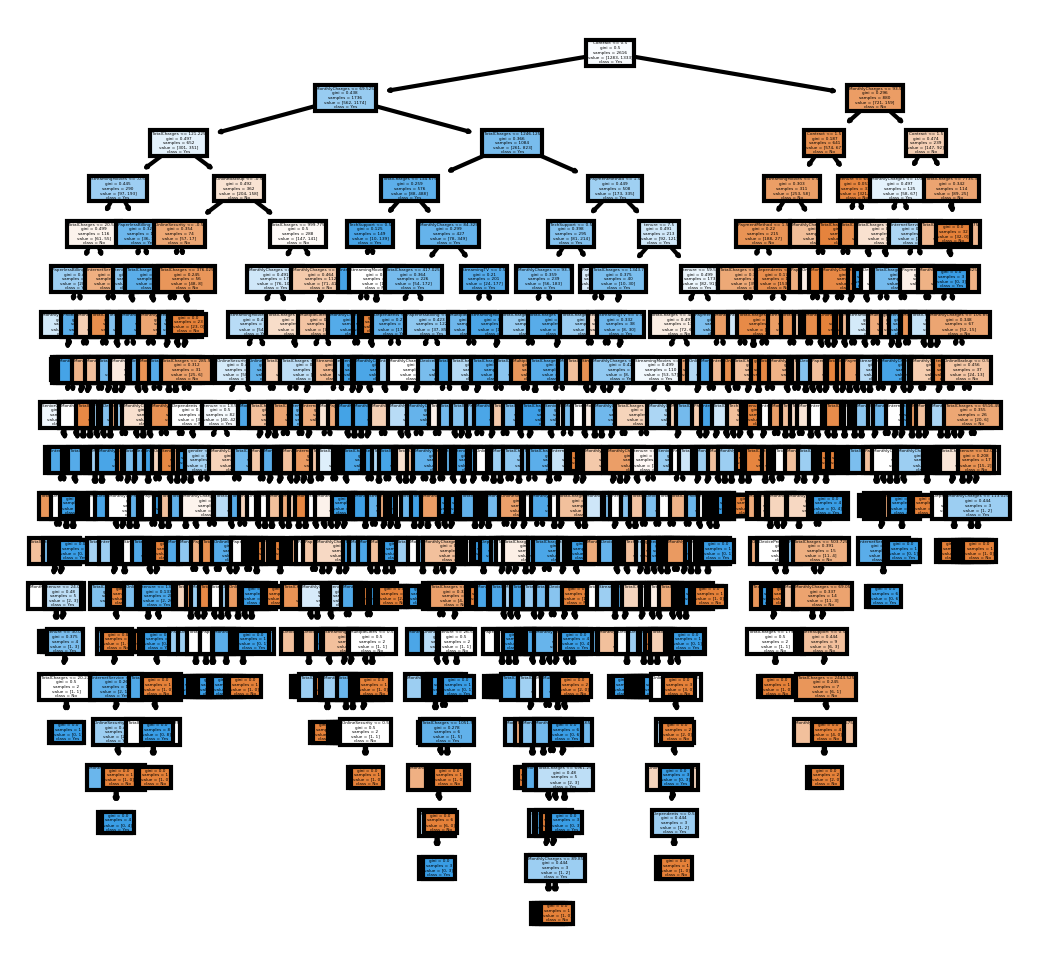

In [411]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

1. BAGGING

In [412]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [413]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

0.7397504456327986


2. BOOSTING

In [414]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=30, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [415]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.7593582887700535


In [416]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 40,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [417]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.7486631016042781


In [418]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [419]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

0.7540106951871658


3. CHANGING HYPERPARAMETERS

In [420]:
dTreeE = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTreeE.fit(X_train, y_train)
print(dTreeE.score(X_train, y_train))
print(dTreeE.score(X_test, y_test))

1.0
0.6648841354723708


In [421]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7454128440366973
0.7201426024955436


In [422]:
dTreeM = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 20, random_state=1)
dTreeM.fit(X_train, y_train)
print(dTreeM.score(X_train, y_train))
print(dTreeM.score(X_test, y_test))

0.8535932721712538
0.6942959001782532


In [423]:
dTreeI = DecisionTreeClassifier(criterion = 'entropy', min_impurity_decrease = 1.0, random_state=1)
dTreeI.fit(X_train, y_train)
print(dTreeI.score(X_train, y_train))
print(dTreeI.score(X_test, y_test))

0.5095565749235474
0.47771836007130125


In [442]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data
    
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error
    
    rmsle = sqrt(metrics.mean_squared_log_error(y_test, pred))  # Root mean squared log error (since the numbers are huge)
    
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
               }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation accross 3 metrics
    
    r2_cv = cv['test_r2'].mean()                                     # mean r squared value
    rmse_cv = np.mean([sqrt(mse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
    rmsle_cv = np.mean([sqrt(msle) for msle in cv['test_msle']]) # mean RMSLE
    
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    return r2, rmse, rmsle, r2_cv, rmse_cv, rmsle_cv, duration, pred  # return all the metrics along with predictions

In [443]:
result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([dTree, dTreeE, bgcl, abcl, gbcl, rfcl], ['Decision Tree - GINI', 'Decision Tree - Entropy',
                                                                  'Bagging Ensemble', 'Ada Boost Ensemble', 
                                                                  'Gradient Boost Ensemble','Random Forest']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key

In [444]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['R Squared', 'MSE', 'MSLE', 'R2 CV', 'RMSE CV', 'RMSLE CV', 'Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

<ipython-input-444-c8ac17e37a6d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary


R Squared       MSE      MSLE        R2 CV  \
Model                                                                  
Decision Tree - GINI      -0.310981  0.571922  0.396426    -0.297158   
Decision Tree - Entropy   -0.343131  0.578892  0.401257    -0.313896   
Bagging Ensemble         -0.0430696  0.510147  0.353607   -0.0600114   
Ada Boost Ensemble        0.0355178  0.490552  0.340025 -0.000311199   
Gradient Boost Ensemble -0.00734807  0.501335  0.347499    0.0287301   
Random Forest             0.0140849  0.495973  0.343782   -0.0309056   

                          RMSE CV  RMSLE CV   Elapsed  
Model                                                  
Decision Tree - GINI     0.569061  0.394443  0.382891  
Decision Tree - Entropy  0.572356  0.396727  0.493733  
Bagging Ensemble         0.514322  0.356501   10.0473  
Ada Boost Ensemble       0.499106  0.345954   2.55224  
Gradient Boost Ensemble  0.491878  0.340944   3.91315  
Random Forest            0.507217  0.351576   5.91038

### Observations
1. Here, for the undersampled data thus through accuracy score and R squared error score, Ada boost classifier works well.
2. Ada boost takes the 4th best amount of time to build the tree and predict the values
3. Here R squared values for the algos dont turn out to be very negative values. 

### Using the oversampled data 

In [445]:
X_over = df_test_over.drop("Churn", axis=1)
y_over = df_test_over['Churn']

In [446]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=.30, random_state=1)

In [447]:
X_over.describe().transpose()

count         mean          std    min       25%      50%  \
gender            10326.0     0.500387     0.500024   0.00    0.0000     1.00   
SeniorCitizen     10326.0     0.159500     0.366160   0.00    0.0000     0.00   
Partner           10326.0     0.476564     0.499475   0.00    0.0000     0.00   
Dependents        10326.0     0.295855     0.456448   0.00    0.0000     0.00   
tenure            10326.0    32.072923    24.593166   0.00    8.0000    28.00   
PhoneService      10326.0     0.902285     0.296943   0.00    1.0000     1.00   
MultipleLines     10326.0     0.321034     0.642993  -1.00    0.0000     0.00   
InternetService   10326.0     1.223513     0.779777   0.00    1.0000     1.00   
OnlineSecurity    10326.0     0.065175     0.703856  -1.00    0.0000     0.00   
OnlineBackup      10326.0     0.157563     0.682301  -1.00    0.0000     0.00   
DeviceProtection  10326.0     0.165698     0.686324  -1.00    0.0000     0.00   
TechSupport       10326.0     0.088127     0.642770  -1.00    0.0000     0.00   
StreamingTV       10326.0     0.238718     0.717310  -1.00    0.0000     0.00   
StreamingMovies   10326.0     0.238621     0.717275  -1.00    0.0000     0.00   
Contract          10326.0     0.514430     0.769475   0.00    0.0000     0.00   
PaperlessBilling  10326.0     0.642940     0.479156   0.00    0.0000     1.00   
PaymentMethod     10326.0     2.158435     1.154119   1.00    1.0000     2.00   
MonthlyCharges    10326.0    68.021911    28.875159  18.25   45.7000    74.55   
TotalCharges      10326.0  2058.356246  2188.286873  18.80  273.4875  1182.55   

                       75%      max  
gender               1.000     1.00  
SeniorCitizen        0.000     1.00  
Partner              1.000     1.00  
Dependents           1.000     1.00  
tenure              55.000    72.00  
PhoneService         1.000     1.00  
MultipleLines        1.000     1.00  
InternetService      2.000     2.00  
OnlineSecurity       1.000     1.00  
OnlineBackup         1.000     1.00  
DeviceProtection     1.000     1.00  
TechSupport          1.000     1.00  
StreamingTV          1.000     1.00  
StreamingMovies      1.000     1.00  
Contract             1.000     2.00  
PaperlessBilling     1.000     1.00  
PaymentMethod        3.000     4.00  
MonthlyCharges      91.050   118.75  
TotalCharges      3295.825  8684.80

In [448]:
X_train.describe().transpose()
## Yes its almost same to the original data

count         mean          std    min       25%      50%  \
gender            7228.0     0.499032     0.500034   0.00    0.0000     0.00   
SeniorCitizen     7228.0     0.157582     0.364373   0.00    0.0000     0.00   
Partner           7228.0     0.476065     0.499461   0.00    0.0000     0.00   
Dependents        7228.0     0.296209     0.456616   0.00    0.0000     0.00   
tenure            7228.0    32.085086    24.572810   0.00    9.0000    28.00   
PhoneService      7228.0     0.903293     0.295579   0.00    1.0000     1.00   
MultipleLines     7228.0     0.324433     0.642377  -1.00    0.0000     0.00   
InternetService   7228.0     1.223575     0.781223   0.00    1.0000     1.00   
OnlineSecurity    7228.0     0.064195     0.704825  -1.00    0.0000     0.00   
OnlineBackup      7228.0     0.167958     0.683282  -1.00    0.0000     0.00   
DeviceProtection  7228.0     0.176121     0.687189  -1.00    0.0000     0.00   
TechSupport       7228.0     0.092695     0.641265  -1.00    0.0000     0.00   
StreamingTV       7228.0     0.247786     0.716604  -1.00    0.0000     0.00   
StreamingMovies   7228.0     0.245988     0.715968  -1.00    0.0000     0.00   
Contract          7228.0     0.519784     0.768676   0.00    0.0000     0.00   
PaperlessBilling  7228.0     0.646375     0.478128   0.00    0.0000     1.00   
PaymentMethod     7228.0     2.165329     1.153587   1.00    1.0000     2.00   
MonthlyCharges    7228.0    68.416166    28.779861  18.25   46.3000    74.75   
TotalCharges      7228.0  2087.661656  2192.108802  18.85  280.7375  1220.30   

                       75%      max  
gender               1.000     1.00  
SeniorCitizen        0.000     1.00  
Partner              1.000     1.00  
Dependents           1.000     1.00  
tenure              55.000    72.00  
PhoneService         1.000     1.00  
MultipleLines        1.000     1.00  
InternetService      2.000     2.00  
OnlineSecurity       1.000     1.00  
OnlineBackup         1.000     1.00  
DeviceProtection     1.000     1.00  
TechSupport          1.000     1.00  
StreamingTV          1.000     1.00  
StreamingMovies      1.000     1.00  
Contract             1.000     2.00  
PaperlessBilling     1.000     1.00  
PaymentMethod        3.000     4.00  
MonthlyCharges      91.350   118.65  
TotalCharges      3382.725  8684.80

In [449]:
X_test.describe().transpose()
## Yes its almost same to the original data

count         mean          std   min       25%      50%  \
gender            3098.0     0.503551     0.500068   0.0    0.0000     1.00   
SeniorCitizen     3098.0     0.163977     0.370314   0.0    0.0000     0.00   
Partner           3098.0     0.477728     0.499584   0.0    0.0000     0.00   
Dependents        3098.0     0.295029     0.456129   0.0    0.0000     0.00   
tenure            3098.0    32.044545    24.644543   0.0    8.0000    28.00   
PhoneService      3098.0     0.899935     0.300135   0.0    1.0000     1.00   
MultipleLines     3098.0     0.313105     0.644464  -1.0    0.0000     0.00   
InternetService   3098.0     1.223370     0.776518   0.0    1.0000     1.00   
OnlineSecurity    3098.0     0.067463     0.701698  -1.0    0.0000     0.00   
OnlineBackup      3098.0     0.133312     0.679499  -1.0    0.0000     0.00   
DeviceProtection  3098.0     0.141382     0.683793  -1.0    0.0000     0.00   
TechSupport       3098.0     0.077469     0.646245  -1.0    0.0000     0.00   
StreamingTV       3098.0     0.217560     0.718626  -1.0    0.0000     0.00   
StreamingMovies   3098.0     0.221433     0.720137  -1.0    0.0000     0.00   
Contract          3098.0     0.501937     0.771315   0.0    0.0000     0.00   
PaperlessBilling  3098.0     0.634926     0.481529   0.0    0.0000     1.00   
PaymentMethod     3098.0     2.142350     1.155384   1.0    1.0000     2.00   
MonthlyCharges    3098.0    67.102066    29.080169  18.4   44.9125    73.90   
TotalCharges      3098.0  1989.983263  2178.163833  18.8  261.1875  1093.15   

                      75%      max  
gender               1.00     1.00  
SeniorCitizen        0.00     1.00  
Partner              1.00     1.00  
Dependents           1.00     1.00  
tenure              55.00    72.00  
PhoneService         1.00     1.00  
MultipleLines        1.00     1.00  
InternetService      2.00     2.00  
OnlineSecurity       1.00     1.00  
OnlineBackup         1.00     1.00  
DeviceProtection     1.00     1.00  
TechSupport          1.00     1.00  
StreamingTV          1.00     1.00  
StreamingMovies      1.00     1.00  
Contract             1.00     2.00  
PaperlessBilling     1.00     1.00  
PaymentMethod        3.00     4.00  
MonthlyCharges      90.35   118.75  
TotalCharges      3109.40  8684.80

In [450]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [451]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8634602969657844


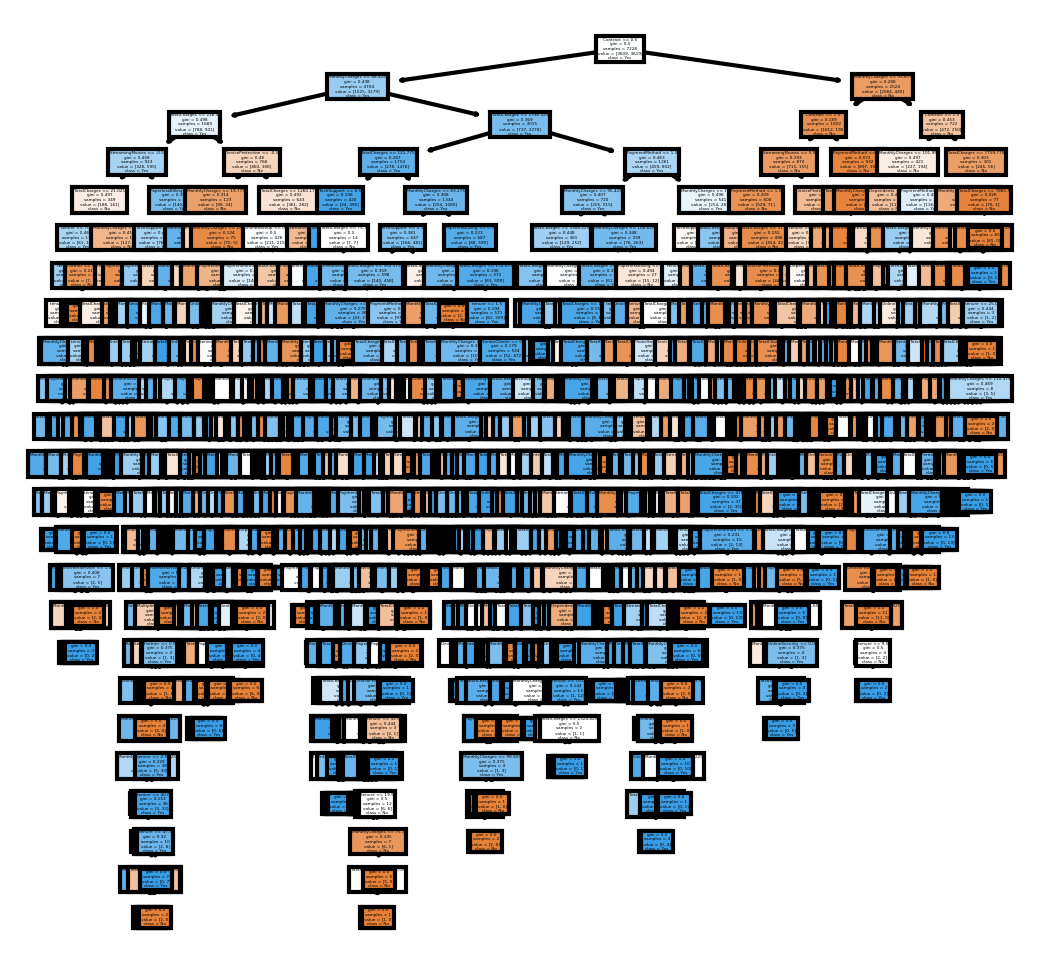

In [265]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree2.png')

1. BAGGING

In [452]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [453]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_train , y_train))
print(bgcl.score(X_test , y_test))

0.9997232982844494
0.8860555196901226


2. BOOSTING

In [454]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=30, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [455]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.76307295029051


In [456]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 40,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [457]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))

0.7721110393802453


In [458]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [459]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))

0.881213686249193


3. CHANGING HYPERPARAMETERS

In [460]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', random_state=1, max_features=8)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

1.0
0.8676565526145901


In [461]:
dTreeMD = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeMD.fit(X_train, y_train)
print(dTreeMD.score(X_train, y_train))
print(dTreeMD.score(X_test, y_test))

0.7494465965688988
0.7479018721755971


In [462]:
dTreeM = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 50, random_state=1)
dTreeM.fit(X_train, y_train)
print(dTreeM.score(X_train, y_train))
print(dTreeM.score(X_test, y_test))

0.8438018815716657
0.7805035506778567


In [463]:
dTreeI = DecisionTreeClassifier(criterion = 'entropy', min_impurity_decrease = 1.0, random_state=1)
dTreeI.fit(X_train, y_train)
print(dTreeI.score(X_train, y_train))
print(dTreeI.score(X_test, y_test))

0.5006917542888766
0.4983860555196901


In [469]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

xgb = XGBClassifier()
cgb = CatBoostClassifier()
lgb = LGBMClassifier()

In [470]:
result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([dTree, dTreeR, bgcl, abcl, gbcl, rfcl,xgb, cgb, lgb], ['Decision Tree - GINI', 'Decision Tree - Entropy',
                                                                  'Bagging Ensemble', 'Ada Boost Ensemble', 
                                                                  'Gradient Boost Ensemble','Random Forest',
                                                                 'Xgboost', 'Catboost','LightGB']):
    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key

D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\shriy\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\shriy\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Learning rate set to 0.023974
0:	learn: 0.6844528	total: 156ms	remaining: 2m 36s
1:	learn: 0.6756844	total: 170ms	remaining: 1m 24s
2:	learn: 0.6671254	total: 187ms	remaining: 1m 2s
3:	learn: 0.6581806	total: 207ms	remaining: 51.5s
4:	learn: 0.6495707	total: 223ms	remaining: 44.4s
5:	learn: 0.6414076	total: 240ms	remaining: 39.7s
6:	learn: 0.6334459	total: 256ms	remaining: 36.3s
7:	learn: 0.6262303	total: 271ms	remaining: 33.6s
8:	learn: 0.6200589	total: 288ms	remaining: 31.7s
9:	learn: 0.6137494	total: 304ms	remaining: 30.1s
10:	learn: 0.6074122	total: 323ms	remaining: 29s
11:	learn: 0.6022412	total: 340ms	remaining: 28s
12:	learn: 0.5972959	total: 357ms	remaining: 27.1s
13:	learn: 0.5923034	total: 375ms	remaining: 26.4s
14:	learn: 0.5871726	total: 392ms	remaining: 25.8s
15:	learn: 0.5822021	total: 410ms	remaining: 25.2s
16:	learn: 0.5774433	total: 426ms	remaining: 24.6s
17:	learn: 0.5731997	total: 442ms	remaining: 24.1s
18:	learn: 0.5690412	total: 458ms	remaining: 23.7s
19:	learn: 0.

In [471]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['R Squared', 'MSE', 'MSLE', 'R2 CV', 'RMSE CV', 'RMSLE CV', 'Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

<ipython-input-471-c8ac17e37a6d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary


R Squared       MSE      MSLE      R2 CV   RMSE CV  \
Model                                                                         
Decision Tree - GINI      0.453835  0.369513  0.256127   0.386273  0.391511   
Decision Tree - Entropy   0.470621   0.36379   0.25216   0.387387  0.390966   
Bagging Ensemble          0.544217  0.337557  0.233976   0.489756  0.356795   
Ada Boost Ensemble       0.0522819  0.486752   0.33739  0.0713864  0.481424   
Gradient Boost Ensemble  0.0884347  0.477377  0.330893   0.094629  0.475522   
Random Forest              0.52485  0.344654  0.238896   0.517432  0.346913   
Xgboost                   0.433177  0.376436  0.260926   0.418364  0.380747   
Catboost                  0.320845  0.412052  0.285613   0.311006  0.414702   
LightGB                   0.338921  0.406532  0.281786   0.312116  0.414384   

                         RMSLE CV  Elapsed  
Model                                       
Decision Tree - GINI     0.271375   1.1232  
Decision Tree - Entropy  0.270997  1.07114  
Bagging Ensemble         0.247311  26.4684  
Ada Boost Ensemble       0.333698  4.42542  
Gradient Boost Ensemble  0.329607  11.1177  
Random Forest            0.240462  13.9976  
Xgboost                  0.263914   16.605  
Catboost                 0.287449  175.055  
LightGB                  0.287229  4.06787

### Observations
1. Here after comparing the accuracy scores and the R squared error values, **Bagging Ensemble** seems to be the most fit.
2. Ada Boost, Random Forest & Xgboost comes quite close to Bagging ensemble while comparison
3. BaggingEnsemble gives good results but takes almost a good amount of time to estimate and predict the values as compared to other algos leaving the Xgboost, Catboost and LightGb boost algos
4. Here R squared values for the algos dont turn out to be very negative as in undersampled data values. 
5. LightGB and GB ensemble took quite less time for constructing the model as compared to otherboosting alsos

### Selecting best fit model

0.8860555196901226


<AxesSubplot:>

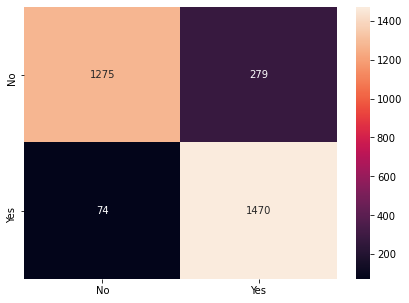

In [473]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(bgcl.score(X_test , y_test))
y_predict = bgcl.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Finalizing the model

1. Here, we see that the TP and TN no.s are quite good. 
2. The people who might churn and are predicted that thwy wont churn is only 74, which is quite less as compared to the true positves and negatives and can be handled by the company. 
3. Here the motive is that the ones who might not churn but are predicted to churn is 279 which gives the company a better window buffer. 
4. Here since its a oversampled data, the bagging classifer works well because the number of yes value samples were quite less and it was oversampled thus the bagging classifier is used in cases where the dataset has less values and the sample size is quite large which is same as our case.

Hence we go with the **Bagging Ensemble built on the Oversampled data model** for using in the GUI prediction

## GUI TO PREDICT CUSTOMER CHURN

In [474]:
from tkinter import *

def click():
    e1 = tkvar1.get() #gender
    e2 = tkvar2.get() #SC
    e3 = tkvar3.get() #Partner
    e4 = tkvar4.get() #dependents
    e5 = text1.get() #tenure
    e6 = tkvar5.get()
    e7 = tkvar6.get()
    e8 = tkvar7.get()
    e9 = tkvar8.get()
    e10 = tkvar9.get()
    e11 = tkvar10.get()
    e12 = tkvar11.get()
    e13 = tkvar12.get()
    e14 = tkvar13.get()
    e15 = tkvar14.get()
    e16 = tkvar15.get()
    e17 = tkvar16.get()
    e18 = text2.get()
    e19 = text3.get()
    
    dataTest = X_test.iloc[0,:]
    
    #gender
    if(e1 == "Female"):
        dataTest.iloc[0] = 1.0
    elif(e1 == "Male"):
        dataTest.iloc[0] = 0.0
    
    #SC
    if(e2 == 1):
        dataTest.iloc[1] = 1.0
    elif(e2 == 0):
        dataTest.iloc[1] = 0.0
    
    #Partner
    if(e3 == "Yes"):
        dataTest.iloc[2] = 1.0
    elif(e3 == "No"):
        dataTest.iloc[2] = 0.0
    
    #dependents
    if(e4 == "Yes"):
        dataTest.iloc[3] = 1.0
    elif(e4 == "No"):
        dataTest.iloc[3] = 0.0
    
    #tenure
    dataTest.iloc[4] = e5
    
    #PhoneService
    if(e6 == "Yes"):
        dataTest.iloc[5] = 1.0
    elif(e6 == "No"):
        dataTest.iloc[5] = 0.0
    
    #Multiplelines
    if(e7 == "Yes"):
        dataTest.iloc[6] = 1.0
    elif(e7 == "No"):
        dataTest.iloc[6] = 0.0
    elif(e7 == "No phone service"):
        dataTest.iloc[6] = -1.0
        
    #internet Service
    if(e8 == "Fiber optic"):
        dataTest.iloc[7] = 2.0
    elif(e8 == "DSL"):
        dataTest.iloc[7] = 1.0
    elif(e8 == "No"):
        dataTest.iloc[7] = 0.0
        
    #online sec   
    if(e9 == "Yes"):
        dataTest.iloc[8] = 1.0
    elif(e9 == "No"):
        dataTest.iloc[8] = 0.0
    elif(e9 == "No internet service"):
        dataTest.iloc[8] = -1.0
        
    #online backup
    if(e10 == "Yes"):
        dataTest.iloc[9] = 1.0
    elif(e10 == "No"):
        dataTest.iloc[9] = 0.0
    elif(e10 == "No internet service"):
        dataTest.iloc[9] = -1.0
        
    #device prot
    if(e11 == "Yes"):
        dataTest.iloc[10] = 1.0
    elif(e11 == "No"):
        dataTest.iloc[10] = 0.0
    elif(e11 == "No internet service"):
        dataTest.iloc[10] = -1.0
        
    #tech sup
    if(e12 == "Yes"):
        dataTest.iloc[11] = 1.0
    elif(e12 == "No"):
        dataTest.iloc[11] = 0.0
    elif(e12 == "No internet service"):
        dataTest.iloc[11] = -1.0
    
    #S T
    if(e13 == "Yes"):
        dataTest.iloc[12] = 1.0
    elif(e13 == "No"):
        dataTest.iloc[12] = 0.0
    elif(e13 == "No internet service"):
        dataTest.iloc[12] = -1.0
        
    #S M
    if(e14 == "Yes"):
        dataTest.iloc[13] = 1.0
    elif(e14 == "No"):
        dataTest.iloc[13] = 0.0
    elif(e14 == "No internet service"):
        dataTest.iloc[13] = -1.0
    
    #contract
    if(e15 == "Month-to-month"):
        dataTest.iloc[14] = 0.0
    elif(e15 == "One year"):
        dataTest.iloc[14] = 1.0
    elif(e15 == "Two year"):
        dataTest.iloc[14] = 2.0
    
    #paperless bill
    if(e16 == "Yes"):
        dataTest.iloc[15] = 1.0
    elif(e16 == "No"):
        dataTest.iloc[15] = 1.0
    
    #Payment method
    if(e15 == "Electronic check"):
        dataTest.iloc[14] = 1.0
    elif(e15 == "Mailed check"):
        dataTest.iloc[14] = 2.0
    elif(e15 == "Bank transfer (automatic)"):
        dataTest.iloc[14] = 3.0
    elif(e15 == "Credit card (automatic)"):
        dataTest.iloc[14] = 4.0
 
    #M C
    dataTest.iloc[17] = e18
    #T C
    dataTest.iloc[18] = e19
    
    print(dataTest)
    
    pred_output = bgcl.predict(dataTest.values.reshape(1, -1))
    print(pred_output[0])
    
    if(pred_output[0] == 1.0):
        outputText = "Yes"
    elif(pred_output[0] == 0.0):
        outputText = "No"
    
    output.insert(END, outputText)



window = Tk()
window.title("My Customer Churn Prediction System")
window.geometry("800x1200")
window['background']='#0ec7c7'


Label(window, text="Enter the following data to predict customer churn",bg = "#0ec7c7",fg="black",font="none 12 bold").grid(row=0, column=0, sticky=W)

# Create a Tkinter variable
tkvar1 = StringVar(window)

# Dictionary with options
Genderchoices = { 'Male','Female'}

popupMenu1 = OptionMenu(window, tkvar1, *Genderchoices)
Label(window, text="Gender", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 2, column = 0, sticky=W)
popupMenu1.config(width= 20, bg="white")
popupMenu1.grid(row = 2, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown(*args):
    gender = tkvar1.get()
    print(gender)
    
# link function to change dropdown
tkvar1.trace('w', change_dropdown)

################################################

# Create a Tkinter variable
tkvar2 = IntVar(window)

# Dictionary with options
intchoices = { 0, 1}
tkvar2.set(0)

popupMenu2 = OptionMenu(window, tkvar2, *intchoices)
Label(window, text="Senior Citizen", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 3, column = 0, sticky=W)
popupMenu2.config(width= 20, bg="white")
popupMenu2.grid(row = 3, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown2(*args):
    SC = tkvar2.get()
    print(SC)
    
# link function to change dropdown
tkvar2.trace('w', change_dropdown2)

################################################

# Create a Tkinter variable
tkvar3 = StringVar(window)

# Dictionary with options
YNchoices = { "Yes", "No"}

popupMenu3 = OptionMenu(window, tkvar3, *YNchoices)
Label(window, text="Partner", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 4, column = 0, sticky=W)
popupMenu3.config(width= 20, bg="white")
popupMenu3.grid(row = 4, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown3(*args):
    Partner = tkvar3.get()
    print(Partner)
    
# link function to change dropdown
tkvar3.trace('w', change_dropdown3)

################################################

# Create a Tkinter variable
tkvar4 = StringVar(window)

popupMenu4 = OptionMenu(window, tkvar4, *YNchoices)
Label(window, text="Dependents", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 5, column = 0, sticky=W)
popupMenu4.config(width= 20, bg="white")
popupMenu4.grid(row = 5, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown4(*args):
    Dependents = tkvar4.get()
    
    
# link function to change dropdown
tkvar4.trace('w', change_dropdown4)

################################################

Label(window, text="Tenure",bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 6, column=0, sticky=W)
text1 = Entry(window, width= 27, bg="white")
text1.grid(row=6, column=1, pady=3, sticky=W)

################################################

# Create a Tkinter variable
tkvar5 = StringVar(window)

popupMenu5 = OptionMenu(window, tkvar5, *YNchoices)
Label(window, text="Phone Service", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 7, column = 0, sticky=W)
popupMenu5.config(width= 20, bg="white")
popupMenu5.grid(row = 7, column =1, pady=3, sticky=W )

# on change dropdown value
def change_dropdown5(*args):
    PhoneS = tkvar5.get()
    print(PhoneS)
    
# link function to change dropdown
tkvar5.trace('w', change_dropdown5)

################################################

# Dictionary with options
Phonechoices = {"Yes","No", "No phone service"}

# Create a Tkinter variable
tkvar6 = StringVar(window)

popupMenu6 = OptionMenu(window, tkvar6, *Phonechoices)
Label(window, text="Multiple Lines", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 8, column = 0, sticky=W)
popupMenu6.config(width= 20, bg="white")
popupMenu6.grid(row = 8, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown6(*args):
    ML = tkvar6.get()
    print(ML)
    
# link function to change dropdown
tkvar6.trace('w', change_dropdown6)

################################################

# Dictionary with options
Internetchoices = {"Fiber optic", "DSL", "No"}

# Create a Tkinter variable
tkvar7 = StringVar(window)

popupMenu7 = OptionMenu(window, tkvar7, *Internetchoices)
Label(window, text="Internet Service", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 9, column = 0, sticky=W)
popupMenu7.config(width= 20, bg="white")
popupMenu7.grid(row = 9, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown7(*args):
    IN = tkvar7.get()
    print(IN)
    
# link function to change dropdown
tkvar7.trace('w', change_dropdown7)

################################################

# Dictionary with options
Ichoices = {"Yes","No", "No internet service"}

# Create a Tkinter variable
tkvar8 = StringVar(window)

popupMenu8 = OptionMenu(window, tkvar8, *Ichoices)
Label(window, text="Online Security", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 10, column = 0, sticky=W)
popupMenu8.config(width= 20, bg="white")
popupMenu8.grid(row = 10, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown8(*args):
    OS = tkvar8.get()
    print(OS)
    
# link function to change dropdown
tkvar8.trace('w', change_dropdown8)

################################################

# Create a Tkinter variable
tkvar9 = StringVar(window)

popupMenu9 = OptionMenu(window, tkvar9, *Ichoices)
Label(window, text="Online Backup", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 11, column = 0, sticky=W)
popupMenu9.config(width= 20, bg="white")
popupMenu9.grid(row = 11, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown9(*args):
    OB = tkvar9.get()
    print(OB)
    
# link function to change dropdown
tkvar9.trace('w', change_dropdown9)

################################################

# Create a Tkinter variable
tkvar10 = StringVar(window)

popupMenu10 = OptionMenu(window, tkvar10, *Ichoices)
Label(window, text="Device Protection", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 12, column = 0, sticky=W)
popupMenu10.config(width= 20, bg="white")
popupMenu10.grid(row = 12, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown10(*args):
    DP = tkvar10.get()
    print(DP)
    
# link function to change dropdown
tkvar10.trace('w', change_dropdown10)

################################################

# Create a Tkinter variable
tkvar11 = StringVar(window)

popupMenu11 = OptionMenu(window, tkvar11, *Ichoices)
Label(window, text="Tech Support", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 13, column = 0, sticky=W)
popupMenu11.config(width= 20, bg="white")
popupMenu11.grid(row = 13, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown11(*args):
    TS = tkvar11.get()
    print(TS)
    
# link function to change dropdown
tkvar11.trace('w', change_dropdown11)

################################################

# Create a Tkinter variable
tkvar12 = StringVar(window)

popupMenu12 = OptionMenu(window, tkvar12, *Ichoices)
Label(window, text="Streaming TV", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 14, column = 0, sticky=W)
popupMenu12.config(width= 20, bg="white")
popupMenu12.grid(row = 14, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown12(*args):
    ST = tkvar12.get()
    print(ST)
    
# link function to change dropdown
tkvar12.trace('w', change_dropdown12)

################################################

# Create a Tkinter variable
tkvar13 = StringVar(window)

popupMenu13 = OptionMenu(window, tkvar13, *Ichoices)
Label(window, text="Streaming Movies", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 15, column = 0, sticky=W)
popupMenu13.config(width= 20, bg="white")
popupMenu13.grid(row = 15, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown13(*args):
    SM = tkvar13.get()
    print(SM)
    
# link function to change dropdown
tkvar13.trace('w', change_dropdown13)

################################################


# Dictionary with options
Cchoices = {"Month-to-month", "One year", "Two year"}

# Create a Tkinter variable
tkvar14 = StringVar(window)

popupMenu14 = OptionMenu(window, tkvar14, *Cchoices)
Label(window, text="Contract", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 16, column = 0, sticky=W)
popupMenu14.config(width= 20, bg="white")
popupMenu14.grid(row = 16, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown14(*args):
    CT = tkvar14.get()
    print(CT)
    
# link function to change dropdown
tkvar14.trace('w', change_dropdown14)

################################################

# Create a Tkinter variable
tkvar15 = StringVar(window)

popupMenu15 = OptionMenu(window, tkvar15, *YNchoices)
Label(window, text="Paperless Billing", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 17, column = 0, sticky=W)
popupMenu15.config(width= 20, bg="white")
popupMenu15.grid(row = 17, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown15(*args):
    PB = tkvar15.get()
    print(PB)
    
# link function to change dropdown
tkvar15.trace('w', change_dropdown15)

################################################

# Dictionary with options
Pchoices = {"Electronic check" , "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)" }

# Create a Tkinter variable
tkvar16 = StringVar(window)

popupMenu16 = OptionMenu(window, tkvar16, *Pchoices)
Label(window, text="Payment Method", bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 18, column = 0, sticky=W)
popupMenu16.config(width= 20, bg="white")
popupMenu16.grid(row = 18, column =1, pady=2, sticky=W )

# on change dropdown value
def change_dropdown16(*args):
    PM = tkvar16.get()
    print(PM)
    
# link function to change dropdown
tkvar16.trace('w', change_dropdown16)

################################################

Label(window, text="Monthly Charges",bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 19, column=0, sticky=W)
text2 = Entry(window, width= 27, bg="white")
text2.grid(row=19, column=1, pady=5, sticky=W)

################################################

Label(window, text="Total Charges",bg = "#0ec7c7",fg="blue",font="none 11 bold").grid(row = 20, column=0, sticky=W)
text3 = Entry(window, width= 27, bg="white")
text3.grid(row=20, column=1, pady=5, sticky=W)

################################################
                
Button(window, text="SUBMIT", width = 20, command = click ).grid(row = 21, column = 0, pady=5, sticky = W)

################################################

Label(window, text="Predicted Churn",bg = "#0ec7c7", fg="blue", font="none 11 bold").grid(row = 22, column=0, pady=4,sticky=W)

output = Text(window, width= 21, height = 1,  bg="white")
output.grid(row=22 , column=1, sticky=W)



window.mainloop()

Female
1
No
No
No phone service
Fiber optic
No
No
Yes
Yes
No
No
Month-to-month
No
Electronic check


D:\shriy\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-474-61758e7e0e80>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTest.iloc[0] = 1.0
<ipython-input-474-61758e7e0e80>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTest.iloc[1] = 1.0
<ipython-input-474-61758e7e0e80>:42: SettingWithCopyWarning: 
A value is 

gender                  1
SeniorCitizen           1
Partner                 0
Dependents              1
tenure                 88
PhoneService            0
MultipleLines          -1
InternetService         2
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        1
TechSupport             1
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        1
PaymentMethod           1
MonthlyCharges        800
TotalCharges        20000
Name: 1232, dtype: object
0


### ONE EXAMPLE OF INPUTS GIVEN TO GUI AND OUTPUT RECEIVED

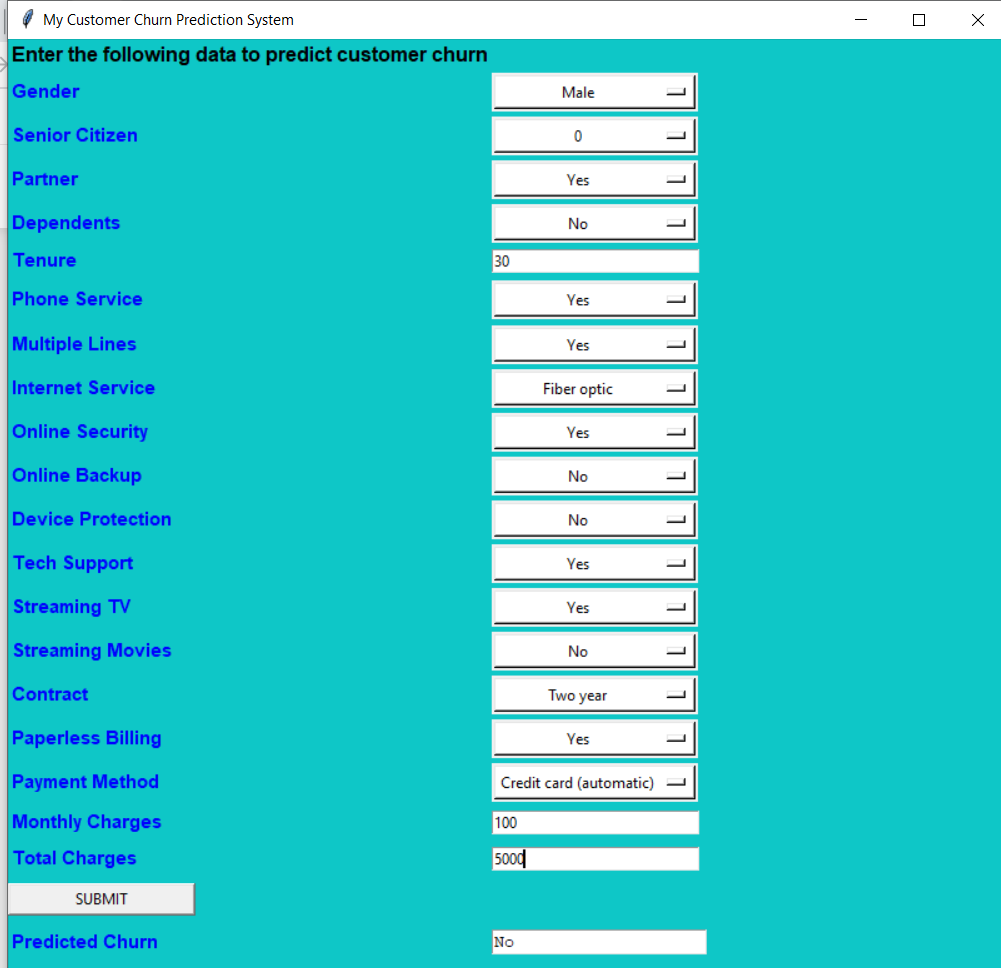

### CONCLUSION

1. We have thus, made a GUI predictor for Company to predict will Churn or not.
2. The model, chosen was a Bagging ensemble model with 88% accuracy. 
3. The model was compared to various ensemble techniques and boosting algos. 
4. It took a greater amount of time to perform but proved to be much accurate than others. 
5. The new boosting algorithms proved to be fast and almost near accurate to the Bagging ensemble.
6. There was a class iimbalance which was fixed with oversampling and thus bagging performed quite good.

### Suggestions on dataset
1. The class imbalance can bias the prediction hence it could be ensured to have almost the same no. of positive an negative churn values data samples.
2. The various values like multiple lines, online backup etc. are not that understandable to the user using the GUI. Hence can be cleared in a better way.
3. No. of data points for class no for churn was of a sufficient amount.
4. No. of features given was also good and contributes in a good way to the class variable churn.